In [1]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import pylab as pl
from scipy.signal import butter,freqz, filtfilt, firwin, iirnotch, lfilter, find_peaks

matplotlib.style.use('ggplot')
%matplotlib notebook

In [2]:
def pull_data(dir_name, file_name):
    f = open(dir_name + '/' + file_name + '.csv')
    xs = []
    ys = []
    zs = []
    rs = []
    timestamps = []
    f.readline() # ignore headers
    for line in f:
        
        value = line.split(',')
        if(value[0] == "time"):
            continue
        if len(value) > 3:
            timestamps.append(float(value[-5])) 
            x = float(value[-1])
            y = float(value[-2])
            z = float(value[-3])
            r = math.sqrt(x ** 2 + y ** 2 + z ** 2)
            xs.append(x)
            ys.append(y)
            zs.append(z)
            rs.append(r)
    return np.array(xs), np.array(ys), np.array(zs), np.array(rs), np.array(timestamps)

In [3]:
#situps
x_data, y_data, z_data, signal, timestamps = pull_data('data','situps')
x_data = x_data[100:3000] 
y_data = y_data[100:3000]
z_data = z_data[100:3000]
mag = signal[100:3000]
timestamps = timestamps[100:3000]

In [4]:
plt.figure(figsize=(10,5))
plt.plot(timestamps, mag, 'r-', label='raw')
plt.title("raw signal from situps")
pl.grid()
pl.show()

<IPython.core.display.Javascript object>

In [5]:
order = 5
fs = 50.0  # sample rate, Hz
cutoff = 2.4  # desired cutoff frequency of the filter, Hz. MODIFY AS APPROPROATE

# Create the filter.
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# Apply the butterworth filter on the signal
finalSig = filtfilt(b, a, mag)

<IPython.core.display.Javascript object>


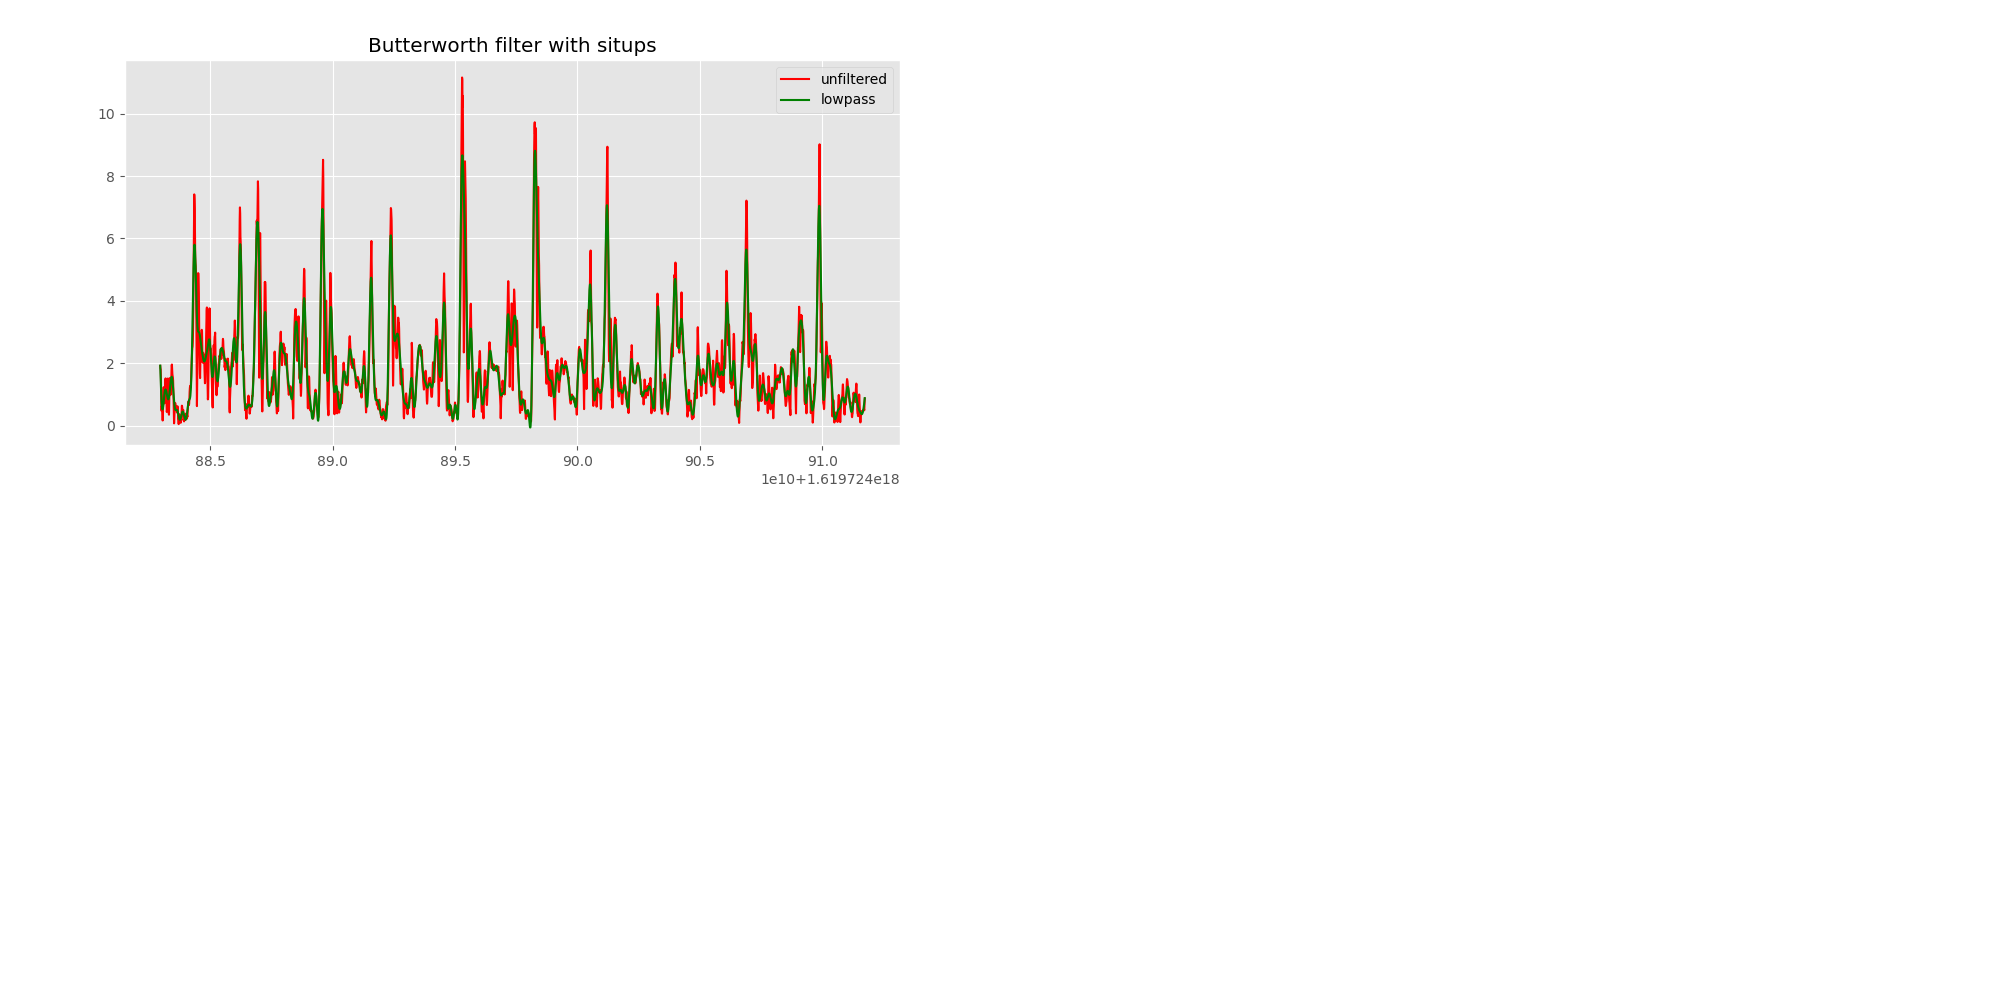

Text(0.5, 1.0, 'Butterworth filter with situps')

In [6]:
plt.figure(figsize=(10,5))
pl.plot(timestamps, signal[100:3000], 'r-',label='unfiltered')
pl.plot(timestamps, finalSig, 'g-', label='lowpass')
plt.legend(loc='best')
plt.title("Butterworth filter with situps")

In [7]:
#apply find peaks here for situps to the filtered signal and print the result
from scipy.signal import find_peaks

peaks, _ = find_peaks(finalSig, height=5.5)
plt.figure(figsize=(10,5))
plt.plot(finalSigm '-g')
plt.plot(peaks, finalSig[peaks], "x")
plt.show()
print("Groundtruth: 10, results: ", len(peaks))

# plt.figure(figsize=(10,5))
# plt.plot(finalSig, 'g-', label='lowpass filter')

SyntaxError: invalid syntax (<ipython-input-7-eb00e1ae7650>, line 6)

In [ ]:
#chinups
x_data, y_data, z_data, signal, timestamps = pull_data('data','chinups')
x_data = x_data[500:2100] 
y_data = y_data[500:2100]
z_data = z_data[500:2100]
mag = signal[500:2100]
timestamps = timestamps[500:2100]

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(timestamps, mag, 'r-', label='raw')
plt.title("raw signal from chinups")
pl.grid()
pl.show()

In [ ]:
order = 5
fs = 50.0  # sample rate, Hz
cutoff = 2.4  # desired cutoff frequency of the filter, Hz. MODIFY AS APPROPROATE

# Create the filter.
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# Apply the butterworth filter on the signal
finalSig = filtfilt(b, a, mag)

In [ ]:
plt.figure(figsize=(10,5))
pl.plot(timestamps, signal[500:2100], 'r-',label='unfiltered')
pl.plot(timestamps, finalSig, 'g-', label='lowpass')
plt.legend(loc='best')
plt.title("Butterworth filter with chinups")

In [ ]:
#apply find peaks here for chinups to the filtered signal
from scipy.signal import find_peaks

peaks, _ = find_peaks(finalSig, height=5.2)
plt.figure(figsize=(10,5))
plt.plot(finalSig, 'g-')
plt.plot(peaks, finalSig[peaks], "x")
plt.show()
print("Groundtruth: 10, results: ", len(peaks))

# plt.figure(figsize=(10,5))
# plt.plot(finalSig, 'g-', label='lowpass filter')

In [ ]:
#dips
x_data, y_data, z_data, signal, timestamps = pull_data('data','dips')
x_data = x_data[550:2800] 
y_data = y_data[550:2800]
z_data = z_data[550:2800]
mag = signal[550:2800]
timestamps = timestamps[550:2800]

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(timestamps, mag, 'r-', label='raw')
plt.title("raw signal from dips")
pl.grid()
pl.show()

In [ ]:
order = 5
fs = 50.0  # sample rate, Hz
cutoff = 0.9  # desired cutoff frequency of the filter, Hz. MODIFY AS APPROPROATE

# Create the filter.
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# Apply the butterworth filter on the signal
finalSig = filtfilt(b, a, mag)

In [ ]:
plt.figure(figsize=(10,5))
pl.plot(timestamps, signal[550:2800], 'r-',label='unfiltered')
pl.plot(timestamps, finalSig, 'g-', label='lowpass')
plt.legend(loc='best')
plt.title("Butterworth filter with dips")

In [ ]:
#apply find peaks here for dips to the filtered signal
from scipy.signal import find_peaks

peaks, _ = find_peaks(finalSig, height=1.67)
plt.figure(figsize=(10,5))
plt.plot(finalSig, 'g-')
plt.plot(peaks, finalSig[peaks], "x")
plt.show()
print("Groundtruth: 10, results: ", len(peaks))


In [ ]:
# -*- coding: utf-8 -*-
"""
This is the script used to train an activity recognition 
classifier on accelerometer data.

"""

import os
import sys
import numpy as np
from sklearn.tree import export_graphviz
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from features import extract_features
from util import slidingWindow, reorient, reset_vars
import pickle


# %%---------------------------------------------------------------------------
#
#		                 Load Data From Disk
#
# -----------------------------------------------------------------------------

print("Loading data...")
sys.stdout.flush()
data_file = 'data/combined.csv'
data = np.genfromtxt(data_file, delimiter=',')
print("Loaded {} raw labelled activity data samples.".format(len(data)))
sys.stdout.flush()

# %%---------------------------------------------------------------------------
#
#		                    Pre-processing
#
# -----------------------------------------------------------------------------

print("Reorienting accelerometer data...")
sys.stdout.flush()
reset_vars()
reoriented = np.asarray([reorient(data[i,1], data[i,2], data[i,3]) for i in range(len(data))])
reoriented_data_with_timestamps = np.append(data[:,0:1],reoriented,axis=1)
data = np.append(reoriented_data_with_timestamps, data[:,-1:], axis=1)
data= data.astype(int)
# %%---------------------------------------------------------------------------
#
#		                Extract Features & Labels
#
# -----------------------------------------------------------------------------

window_size = 20
step_size = 20

# sampling rate should be about 25 Hz; you can take a brief window to confirm this
n_samples = 1000
time_elapsed_seconds = (data[n_samples,0] - data[0,0]) / 1000
sampling_rate = n_samples / time_elapsed_seconds

# TODO: list the class labels that you collected data for in the order of label_index (defined while collecting data)

class_names = ["chinups","dips", "sitting", "situps","standing"] #done in this order

print("Extracting features and labels for window size {} and step size {}...".format(window_size, step_size))
sys.stdout.flush() 

X = []
Y = []

for i,window_with_timestamp_and_label in slidingWindow(data, window_size, step_size):
    window = window_with_timestamp_and_label[:,1:-1]   
    feature_names, x = extract_features(window)
    X.append(x)
    Y.append(window_with_timestamp_and_label[10, -1])
    
X = np.asarray(X)
Y = np.asarray(Y)
n_features = len(X)
    
print("Finished feature extraction over {} windows".format(len(X)))
print("Unique labels found: {}".format(set(Y)))
print("\n")
sys.stdout.flush()

# %%---------------------------------------------------------------------------
#
#		                Train & Evaluate Classifier
#
# -----------------------------------------------------------------------------


# TODO: split data into train and test datasets using 10-fold cross validation
cv = model_selection.KFold(n_splits=10, random_state=None, shuffle=True)
total_accuracy = 0
total_precision = 0
total_recall = 0
"""
TODO: iterating over each fold, fit a decision tree classifier on the training set.
Then predict the class labels for the test set and compute the confusion matrix
using predicted labels and ground truth values. Print the accuracy, precision and recall
for each fold.
"""
tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# TODO: calculate and print the average accuracy, precision and recall values over all 10 folds
for i, (train_index, test_index) in enumerate(cv.split(X, Y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    
    tree.fit(X_train, y_train)
   
    # predict the labels on the test data
    y_pred = tree.predict(X_test)

    # show the comparison between the predicted and ground-truth labels
    conf = confusion_matrix(y_test, y_pred, labels=[0,1,2,3])
    
    accuracy = np.sum(np.diag(conf))/float(np.sum(conf))
    total_accuracy += accuracy
    
    precision = np.nan_to_num(np.diag(conf)/np.sum(conf, axis=1).astype(float))
    total_precision += precision
    
    recall = np.nan_to_num(np.diag(conf)/np.sum(conf, axis=0).astype(float))
    total_recall += recall
   
print("Average accuracy per label: {}".format(total_accuracy/10.0))  
print("Average precision per label: {}".format(total_precision/10.0))
print("Avg recall per label: {}".format(total_recall/10.0))

# TODO: train the decision tree classifier on entire dataset
best_classifier = RandomForestClassifier(n_estimators=100)
best_classifier.fit(X,Y) 

# TODO: Save the decision tree visualization to disk - replace 'tree' with your decision tree and run the below line

export_graphviz(tree, out_file='tree.dot', feature_names = feature_names)

classifier_filename='classifier.pickle'
print("Saving best classifier")

# TODO: Save the classifier to disk - replace 'tree' with your decision tree and run the below line
with open('classifier.pickle', 'wb') as f:
    pickle.dump(tree, f)
